In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from upsetplot import plot as up_plt
from datetime import datetime

plt.style.use('ggplot')
%matplotlib inline

In [11]:
ALLEN_AI_RES_PATH = "../res/allenai/metadata.csv"

In [12]:
df_allen = pd.read_csv(ALLEN_AI_RES_PATH)

print(len(df_allen.index))
df_allen.head(5)

59887


E:\Python\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,arxiv_id,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998.0,unk,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc125340?pdf=re...
1,ymceytj3,e3d0d482ebd9a8ba81c254cc433f314142e72174,PMC,"Crystal structure of murine sCEACAM1a[1,4]: a ...",10.1093/emboj/21.9.2076,PMC125375,11980704.0,unk,CEACAM1 is a member of the carcinoembryonic an...,2002-05-01,"Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc125375?pdf=re...
2,wzj2glte,00b1d99e70f779eb4ede50059db469c65e8c1469,PMC,Synthesis of a novel hepatitis C virus protein...,10.1093/emboj/20.14.3840,PMC125543,11447125.0,no-cc,Hepatitis C virus (HCV) is an important human ...,2001-07-16,"Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...",EMBO J,NaN,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,2sfqsfm1,cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0,PMC,Structure of coronavirus main proteinase revea...,10.1093/emboj/cdf327,PMC126080,12093723.0,unk,The key enzyme in coronavirus polyprotein proc...,2002-07-01,"Anand, Kanchan; Palm, Gottfried J.; Mesters, J...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc126080?pdf=re...
4,i0zym7iq,dde02f11923815e6a16a31dd6298c46b109c5dfa,PMC,Discontinuous and non-discontinuous subgenomic...,10.1093/emboj/cdf635,PMC136939,12456663.0,unk,"Arteri-, corona-, toro- and roniviruses are ev...",2002-12-01,"van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc136939?pdf=re...


In [13]:
df_allen.isna().sum().sort_values(ascending=False)

arxiv_id                       59211
Microsoft Academic Paper ID    58923
WHO #Covidence                 58119
pubmed_id                      18559
sha                            14124
pmcid                          11748
abstract                       11130
full_text_file                  8461
journal                         7059
doi                             4086
authors                         2591
url                              440
title                            163
publish_time                       8
license                            0
has_pdf_parse                      0
source_x                           0
has_pmc_xml_parse                  0
cord_uid                           0
dtype: int64

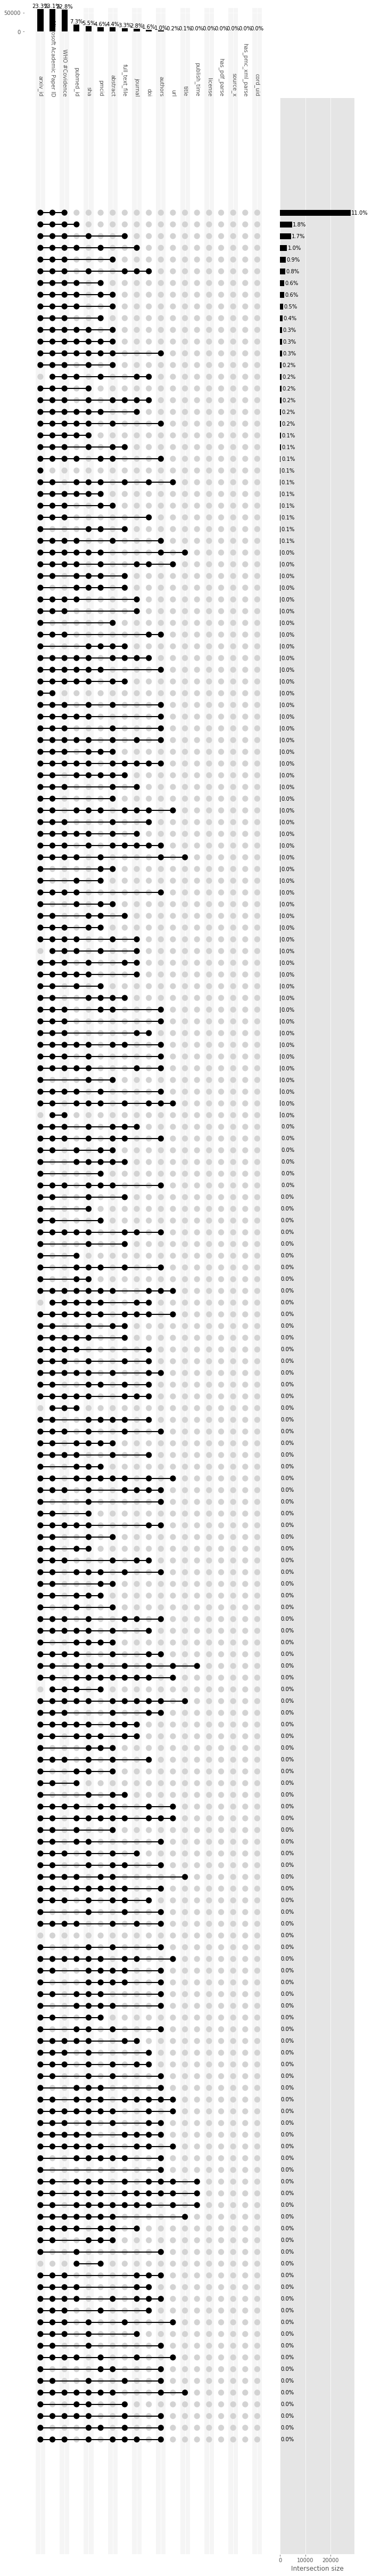

In [14]:
mis_vals = df_allen.isna().groupby(df_allen.columns.tolist()).size()
up_plt(mis_vals, orientation='vertical', show_percentages=True, sort_by='cardinality')
plt.show()

PMC         32239
Elsevier    22762
medrxiv      2007
biorxiv      1064
WHO           918
arxiv         797
CZI           100
Name: source_x, dtype: int64

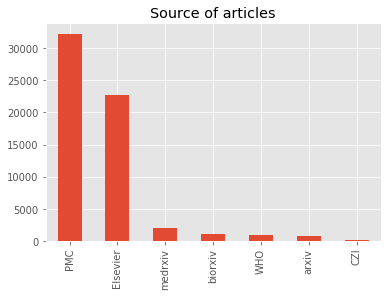

In [15]:
df_allen.source_x.value_counts().plot(kind='bar', title='Source of articles')
df_allen.source_x.value_counts()

In [17]:
def map_to_parsed_time(row):
    str_date = row['publish_time']
    if pd.isna(str_date):
        return np.nan
    
    try:
        if row['source_x'] in ['Elsevier', 'biorxiv', 'medrxiv', 'arxiv']:
            return datetime.strptime(str_date, '%Y-%m-%d')
        elif row['source_x'] in ['CZI', 'WHO']:
            if len(str_date) == 4:
                return datetime.strptime(str_date, '%Y')
            elif len(str_date) == 10:
                return datetime.strptime(str_date, '%Y-%m-%d')
        elif row['source_x'] == 'PMC':
            if any([x for x in ['Spring', 'Autumn', 'Winter', 'Summer', 'Fall'] if x in str_date]):
                str_date = str_date[:4]
            if len(str_date) == 4:
                return datetime.strptime(str_date, '%Y')
            if len(str_date) == 12:
                # e.g. 2016 Jun-Dec ---> 2016 Dec
                str_date = str_date[:5] + str_date[-3:]
            if len(str_date) == 8:
                return datetime.strptime(str_date, '%Y %b')
            if len(str_date) > 12:
                # e.g. 2011 May 10 Jul-Sep ???
                str_date = str_date[:10].strip()
            if len(str_date) == 10:
                str_date = str_date[:9] + '0' + str_date[-1:]
            if len(str_date) == 11 and str_date[-2:].isdigit():
                if '-' in str_date:
                    # '2020-02-204' ??
                    return datetime.strptime(str_date[:7], '%Y-%m')
                return datetime.strptime(str_date, '%Y %b %d')
        elif row['source_x'] == 'PMC_new':
            if str_date[0] == '[':
                str_date = str_date[2:12]
            return datetime.strptime(str_date, '%Y-%m-%d')
        print(str_date, row['source_x'] )
    except Exception as e:
        print('Invalid date ' + str_date, '--', e)
    return np.nan

df_allen['parsed_time'] = df_allen.apply(map_to_parsed_time, axis=1)   

NA 8


parsed_time
2020-12-31    10370
2019-12-31     3784
2018-12-31     3629
2016-12-31     3475
2017-12-31     3448
2015-12-31     3318
2014-12-31     3079
2013-12-31     2841
2012-12-31     2516
2011-12-31     2329
Name: source_x, dtype: int64

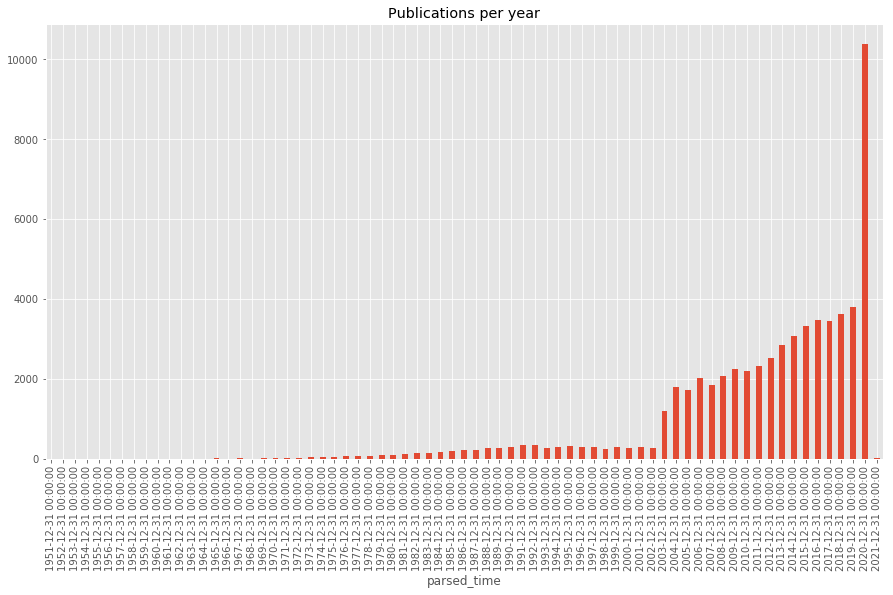

In [18]:
df_allen.set_index('parsed_time').resample('y').count()['source_x'].plot(kind='bar', figsize=(15,8), title='Publications per year')
print('NA', df_allen.parsed_time.isna().sum())
df_allen.set_index('parsed_time').resample('y').count()['source_x'].sort_values(ascending=False).head(10)

Journal of Virology    1753
PLoS One               1576
Virology                937
Emerg Infect Dis        749
The Lancet              688
Viruses                 582
Virus Research          555
Vaccine                 517
Arch Virol              505
Sci Rep                 497
Name: journal, dtype: int64

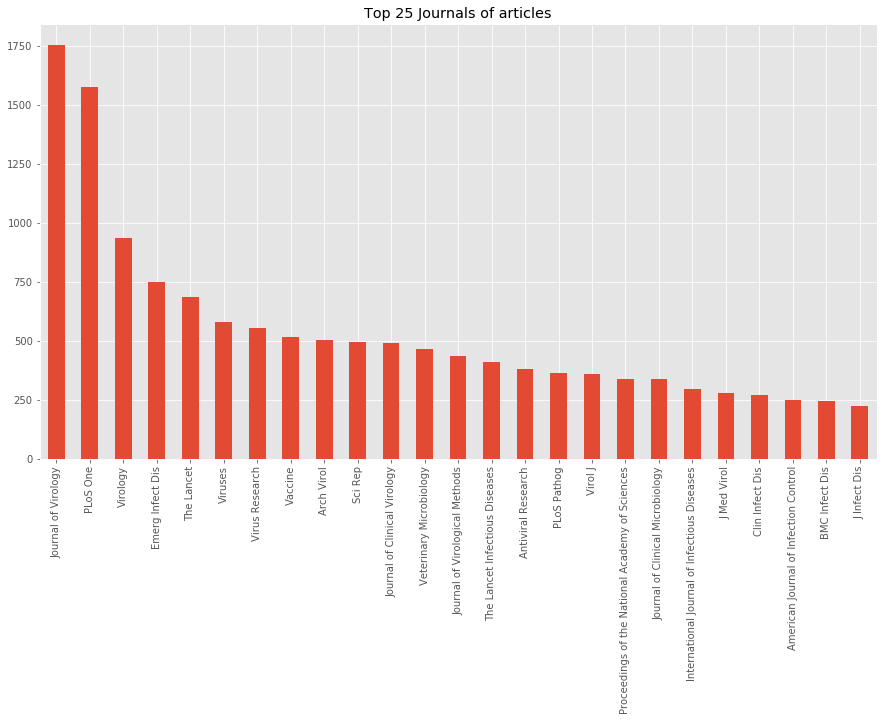

In [19]:
df_allen.journal.value_counts().head(25).plot(kind='bar', title='Top 25 Journals of articles', figsize=(15,8))
df_allen.journal.value_counts().head(10)